# 142. Linked List Cycle II 

Given a linked list, return the node where the cycle begins. If there is no cycle, return null.

To represent a cycle in the given linked list, we use an integer pos which represents the position (0-indexed) in the linked list where tail connects to. If pos is -1, then there is no cycle in the linked list.

Note: Do not modify the linked list.

In [2]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def detectCycle(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        def isCycle(head):
            if head:
                slow = fast = head
            else:
                return False
            
            while slow.next and fast.next and fast.next.next:
                if slow.next.val == fast.next.next.val:
                    return True
                else:
                    slow = slow.next
                    fast = fast.next.next
            return False
        
        if isCycle(head):
            arr = []
            while head:
                if head not in arr:
                    arr.append(head)
                else:
                    return head
                head = head.next
        else:
            return None
            

# Analysis

### Time Complexity: O(n + length(Cycle))
### Space Complexity: O(n)

# Better Solution

In [3]:
class Solution(object):
    def getIntersect(self, head):
        tortoise = head
        hare = head

        # A fast pointer will either loop around a cycle and meet the slow
        # pointer or reach the `null` at the end of a non-cyclic list.
        while hare is not None and hare.next is not None:
            tortoise = tortoise.next
            hare = hare.next.next
            if tortoise == hare:
                return tortoise

        return None

    def detectCycle(self, head):
        if head is None:
            return None

        # If there is a cycle, the fast/slow pointers will intersect at some
        # node. Otherwise, there is no cycle, so we cannot find an entrance to
        # a cycle.
        intersect = self.getIntersect(head)
        if intersect is None:
            return None

        # To find the entrance to the cycle, we have two pointers traverse at
        # the same speed -- one from the front of the list, and the other from
        # the point of intersection.
        ptr1 = head
        ptr2 = intersect
        while ptr1 != ptr2:
            ptr1 = ptr1.next
            ptr2 = ptr2.next

        return ptr1


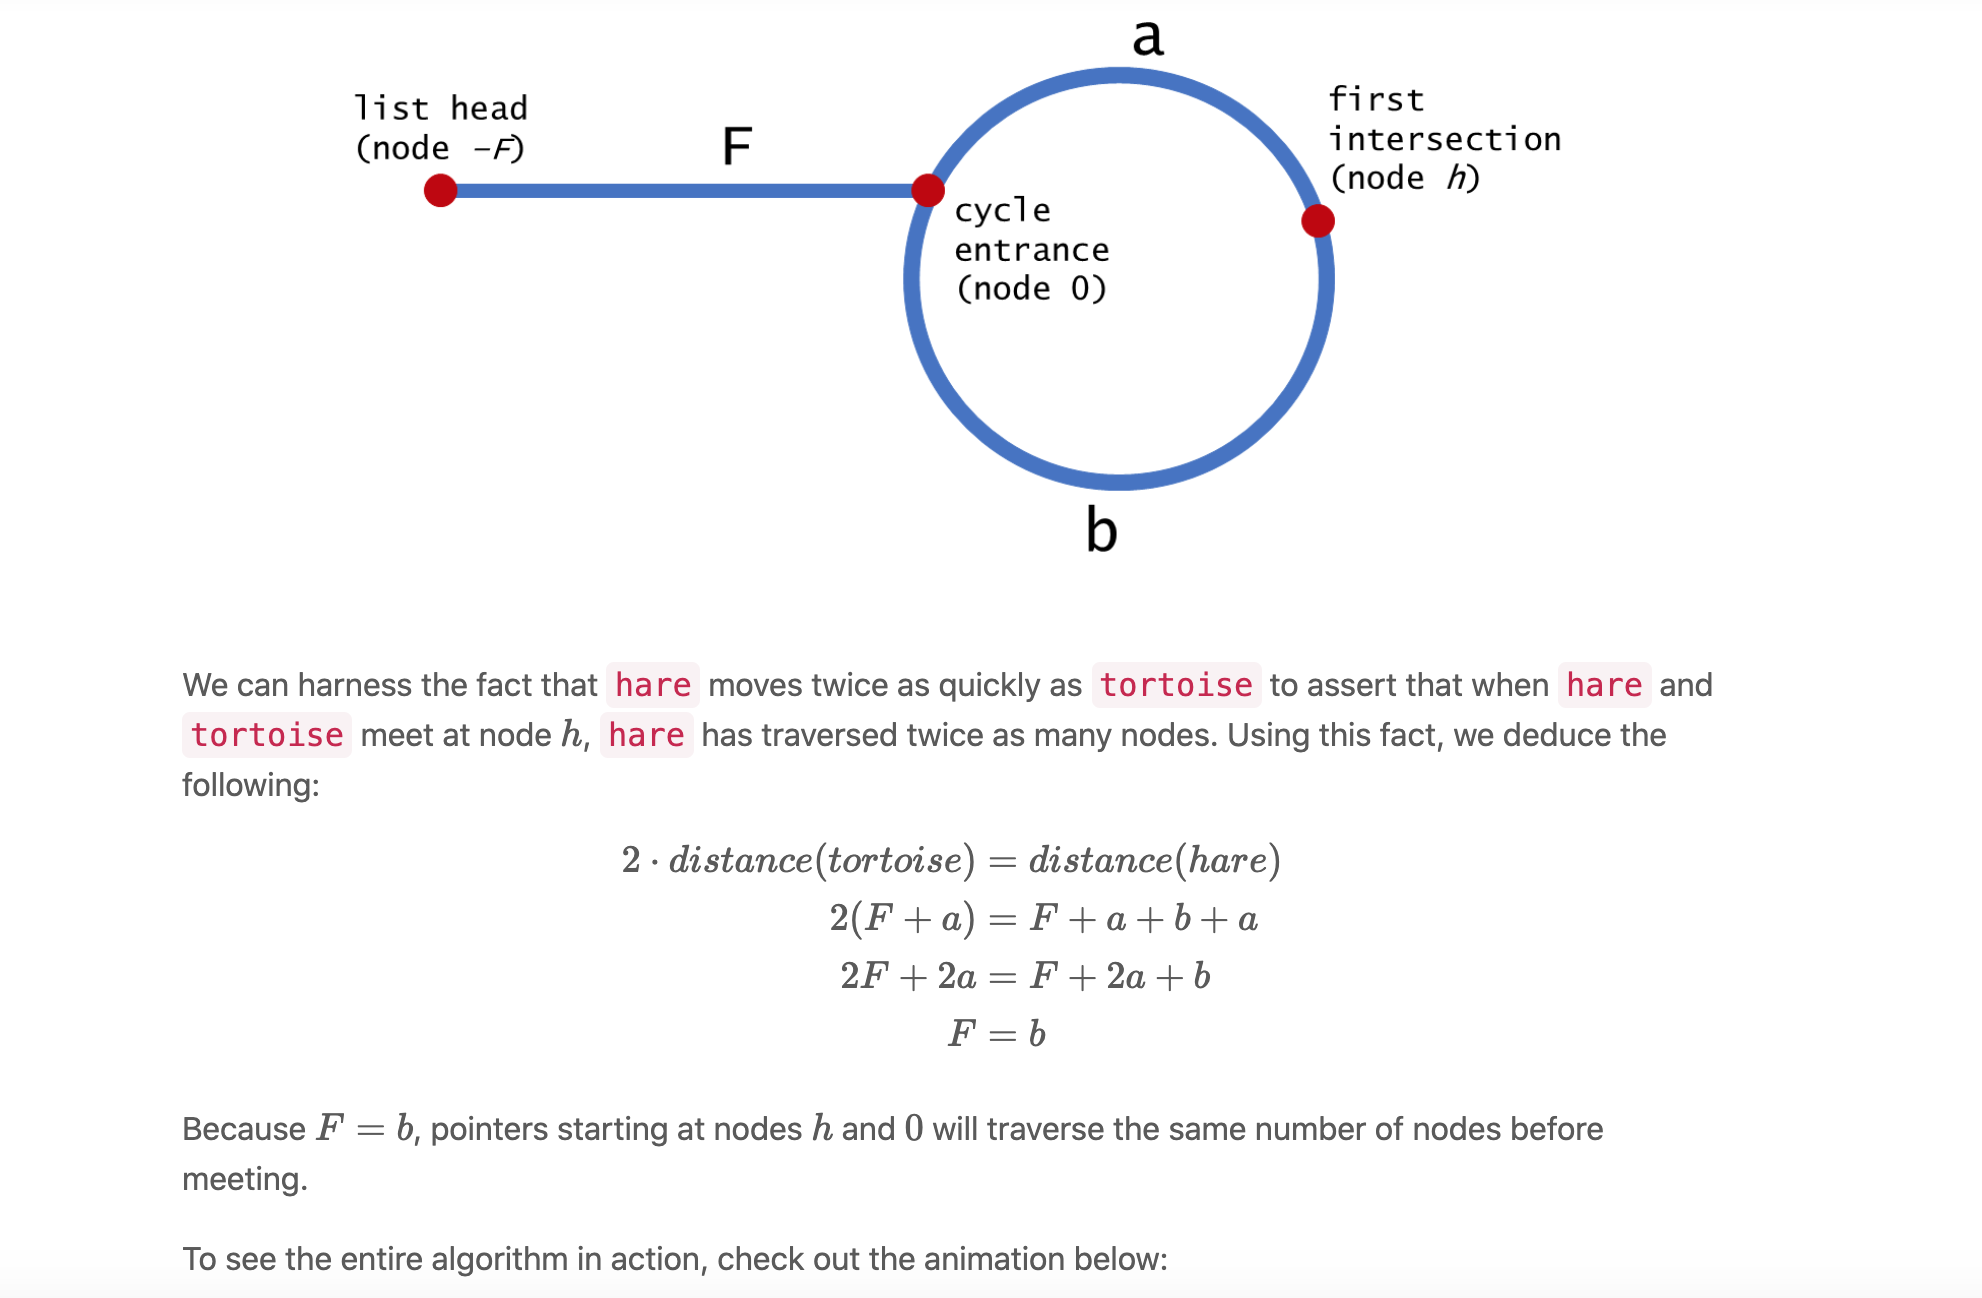

In [1]:
from IPython.display import Image
Image(filename='description.png')

# Analysis

### Time Complexity: O(n + length(Cycle)) 
### Space Complexity: O(1)